## Сессия 2

### 2.1 Разбиение набора данных

Разделите исходный набор данных на обучающую и тестирующую выборки оптимальным
образом. Приведите обоснование разбиения


Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action="ignore")

Записываем файл с прошлой сессий в dataframe.

In [56]:
df_all = pd.read_csv('result_1.csv')

In [57]:
df_all

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population,month,year,RT,hazard_level
0,Afghanistan,2020-01-10,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,...,6.3,33.1,37.746,0.5,0.511,41128772.0,1,2020,0.0,безопасно
1,Afghanistan,2020-01-11,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,...,6.3,33.1,37.746,0.5,0.511,41128772.0,1,2020,0.0,безопасно
2,Afghanistan,2020-01-12,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,...,6.3,33.1,37.746,0.5,0.511,41128772.0,1,2020,0.0,безопасно
3,Afghanistan,2020-01-13,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,...,6.3,33.1,37.746,0.5,0.511,41128772.0,1,2020,0.0,безопасно
4,Afghanistan,2020-01-14,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,...,6.3,33.1,37.746,0.5,0.511,41128772.0,1,2020,0.0,безопасно
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364871,Zimbabwe,2024-01-31,266266.0,0.0,4.429,5737.0,0.0,0.0,16314.719,0.0,...,1.6,30.7,36.791,1.7,0.571,16320539.0,1,2024,1.0,безопасно
364872,Zimbabwe,2024-02-01,266266.0,0.0,4.429,5737.0,0.0,0.0,16314.719,0.0,...,1.6,30.7,36.791,1.7,0.571,16320539.0,2,2024,0.0,безопасно
364873,Zimbabwe,2024-02-02,266266.0,0.0,4.429,5737.0,0.0,0.0,16314.719,0.0,...,1.6,30.7,36.791,1.7,0.571,16320539.0,2,2024,0.0,безопасно
364874,Zimbabwe,2024-02-03,266266.0,0.0,4.429,5737.0,0.0,0.0,16314.719,0.0,...,1.6,30.7,36.791,1.7,0.571,16320539.0,2,2024,0.0,безопасно


In [58]:
# Меняем значения hazard_level на 0, 1, 2 для работы с графиками
clus = {'средняя': 1 ,'безопасно': 0, 'опасно': 2}
df_all['hazard_level'] = df_all['hazard_level'].map(clus)

In [59]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364876 entries, 0 to 364875
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   location                         364876 non-null  object 
 1   date                             364876 non-null  object 
 2   total_cases                      364876 non-null  float64
 3   new_cases                        364876 non-null  float64
 4   new_cases_smoothed               364876 non-null  float64
 5   total_deaths                     364876 non-null  float64
 6   new_deaths                       364876 non-null  float64
 7   new_deaths_smoothed              364876 non-null  float64
 8   total_cases_per_million          364876 non-null  float64
 9   new_cases_per_million            364876 non-null  float64
 10  new_cases_smoothed_per_million   364876 non-null  float64
 11  total_deaths_per_million         364876 non-null  float64
 12  ne

Создаём переменную для классификаций.

In [60]:
X = df_all[['total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed'
,'total_cases_per_million'         
,'total_deaths_per_million'             
,'population'           
,'RT']]

In [61]:
X

,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT
0,0.0,0.000,0.0,0.0,0.000,0.00,41128772.0,0.0
1,0.0,0.000,0.0,0.0,0.000,0.00,41128772.0,0.0
2,0.0,0.000,0.0,0.0,0.000,0.00,41128772.0,0.0
3,0.0,0.000,0.0,0.0,0.000,0.00,41128772.0,0.0
4,0.0,0.000,0.0,0.0,0.000,0.00,41128772.0,0.0
...,...,...,...,...,...,...,...,...
364871,266266.0,4.429,5737.0,0.0,16314.719,351.52,16320539.0,1.0
364872,266266.0,4.429,5737.0,0.0,16314.719,351.52,16320539.0,0.0
364873,266266.0,4.429,5737.0,0.0,16314.719,351.52,16320539.0,0.0
364874,266266.0,4.429,5737.0,0.0,16314.719,351.52,16320539.0,0.0


Отдельно записывает целевую переменную.

In [62]:
y = df_all["hazard_level"]

Делим выборку на тестовую и обучающаю.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [64]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(244466, 8) (120410, 8) (244466,) (120410,)


### 2.2 Визуализация зависимостей данных

Используя программные средства, визуализируйте зависимости атрибутов в наборе данных.
Визуализация должна отражать влияние атрибутов на определение классов – уровня опасности
посещения страны для туриста. Произведите расчеты зависимостей по выбранным алгоритмам.
Приведите интерпретацию полученным результатам.

Для начала, оставим те признаки которые нам понадобятся для анализа, так как в dataframe остались информативные, но не нужные нам, признаки.

In [65]:
df = df_all[['total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed'
,'total_cases_per_million'         
,'total_deaths_per_million'             
,'population'           
,'RT', 'hazard_level']]

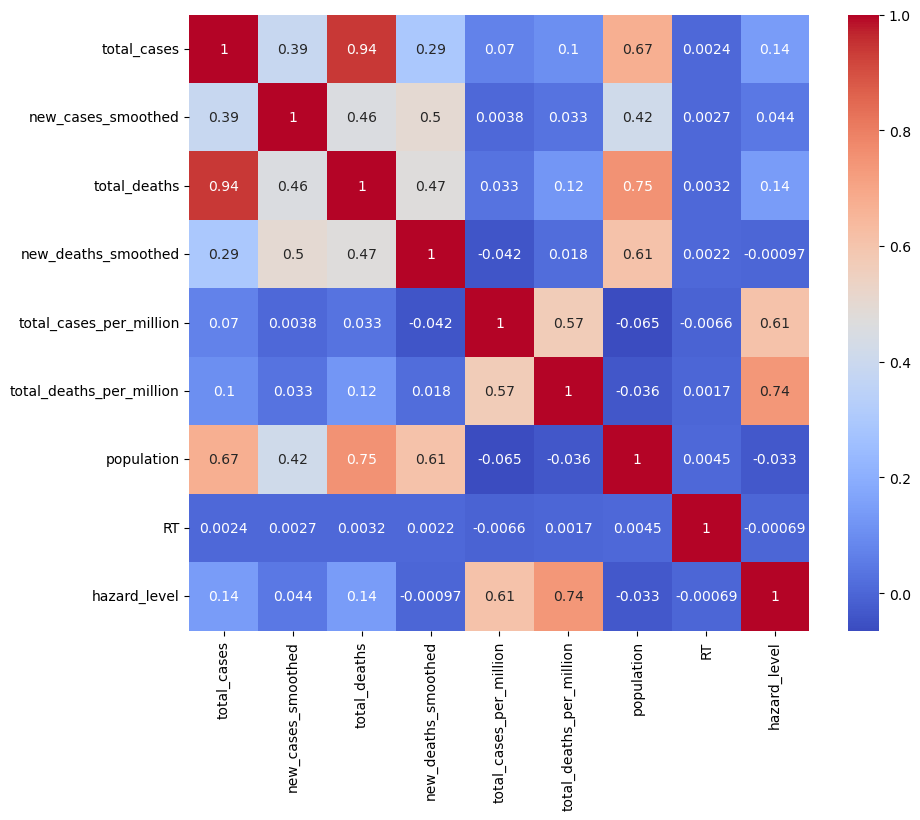

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Видим что целевая переменная коррелирует с total_cases_per_million и total_deaths_per_million. Так же есть хорошая зависимость у population с total_cases и total_deaths. Так же радует что есть зависимость у total_deaths с total_cases. Так же есть корреляция у других признаков, которая нам не интересна.

#### График попарных зависимостей

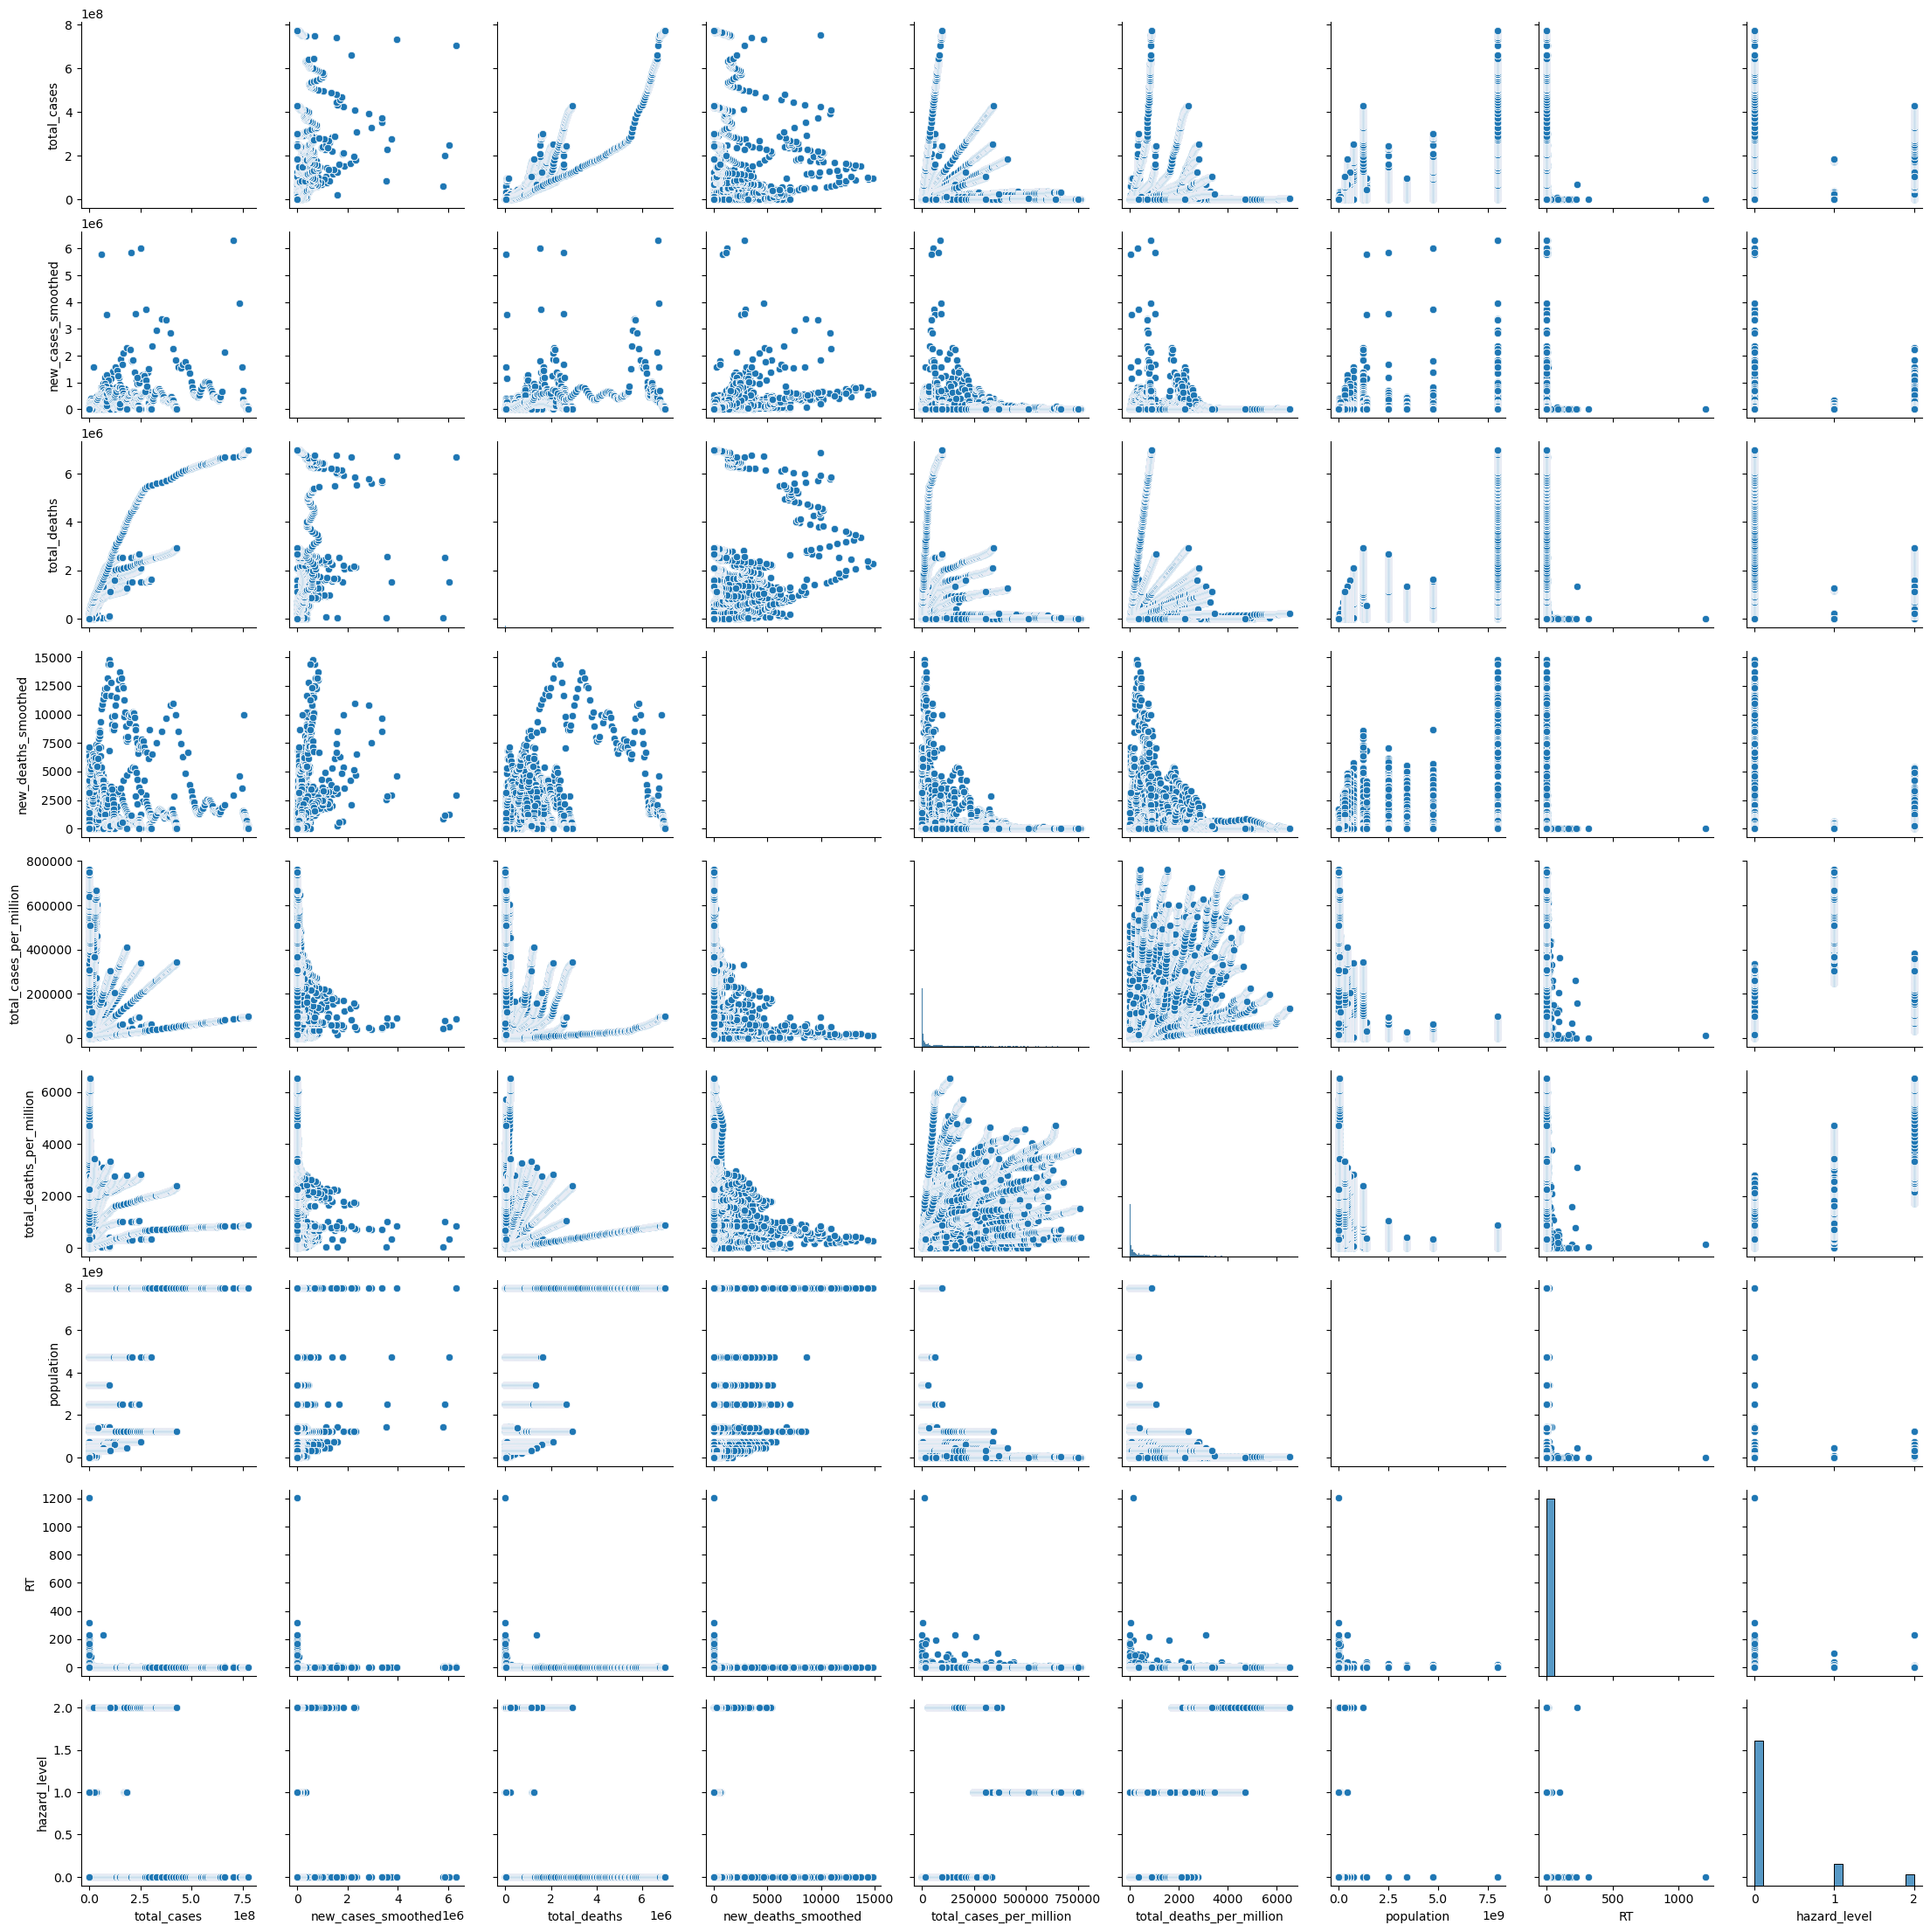

In [13]:
sns.pairplot(df)

Можно увидеть что полностью отсутвует линейная зависимость между признакми. При зависимости total_cases total_deaths можно увидеть увеличение смертей при увелечений общих случаев заражения. Так же по зависимости total_deaths и new_deaths_smoothed можно увидеть, что со временем новых случаев смерти стало в разы меньше, намного больше смертей было в начале.

#### Зависимоть данных признаков от целевой переменной

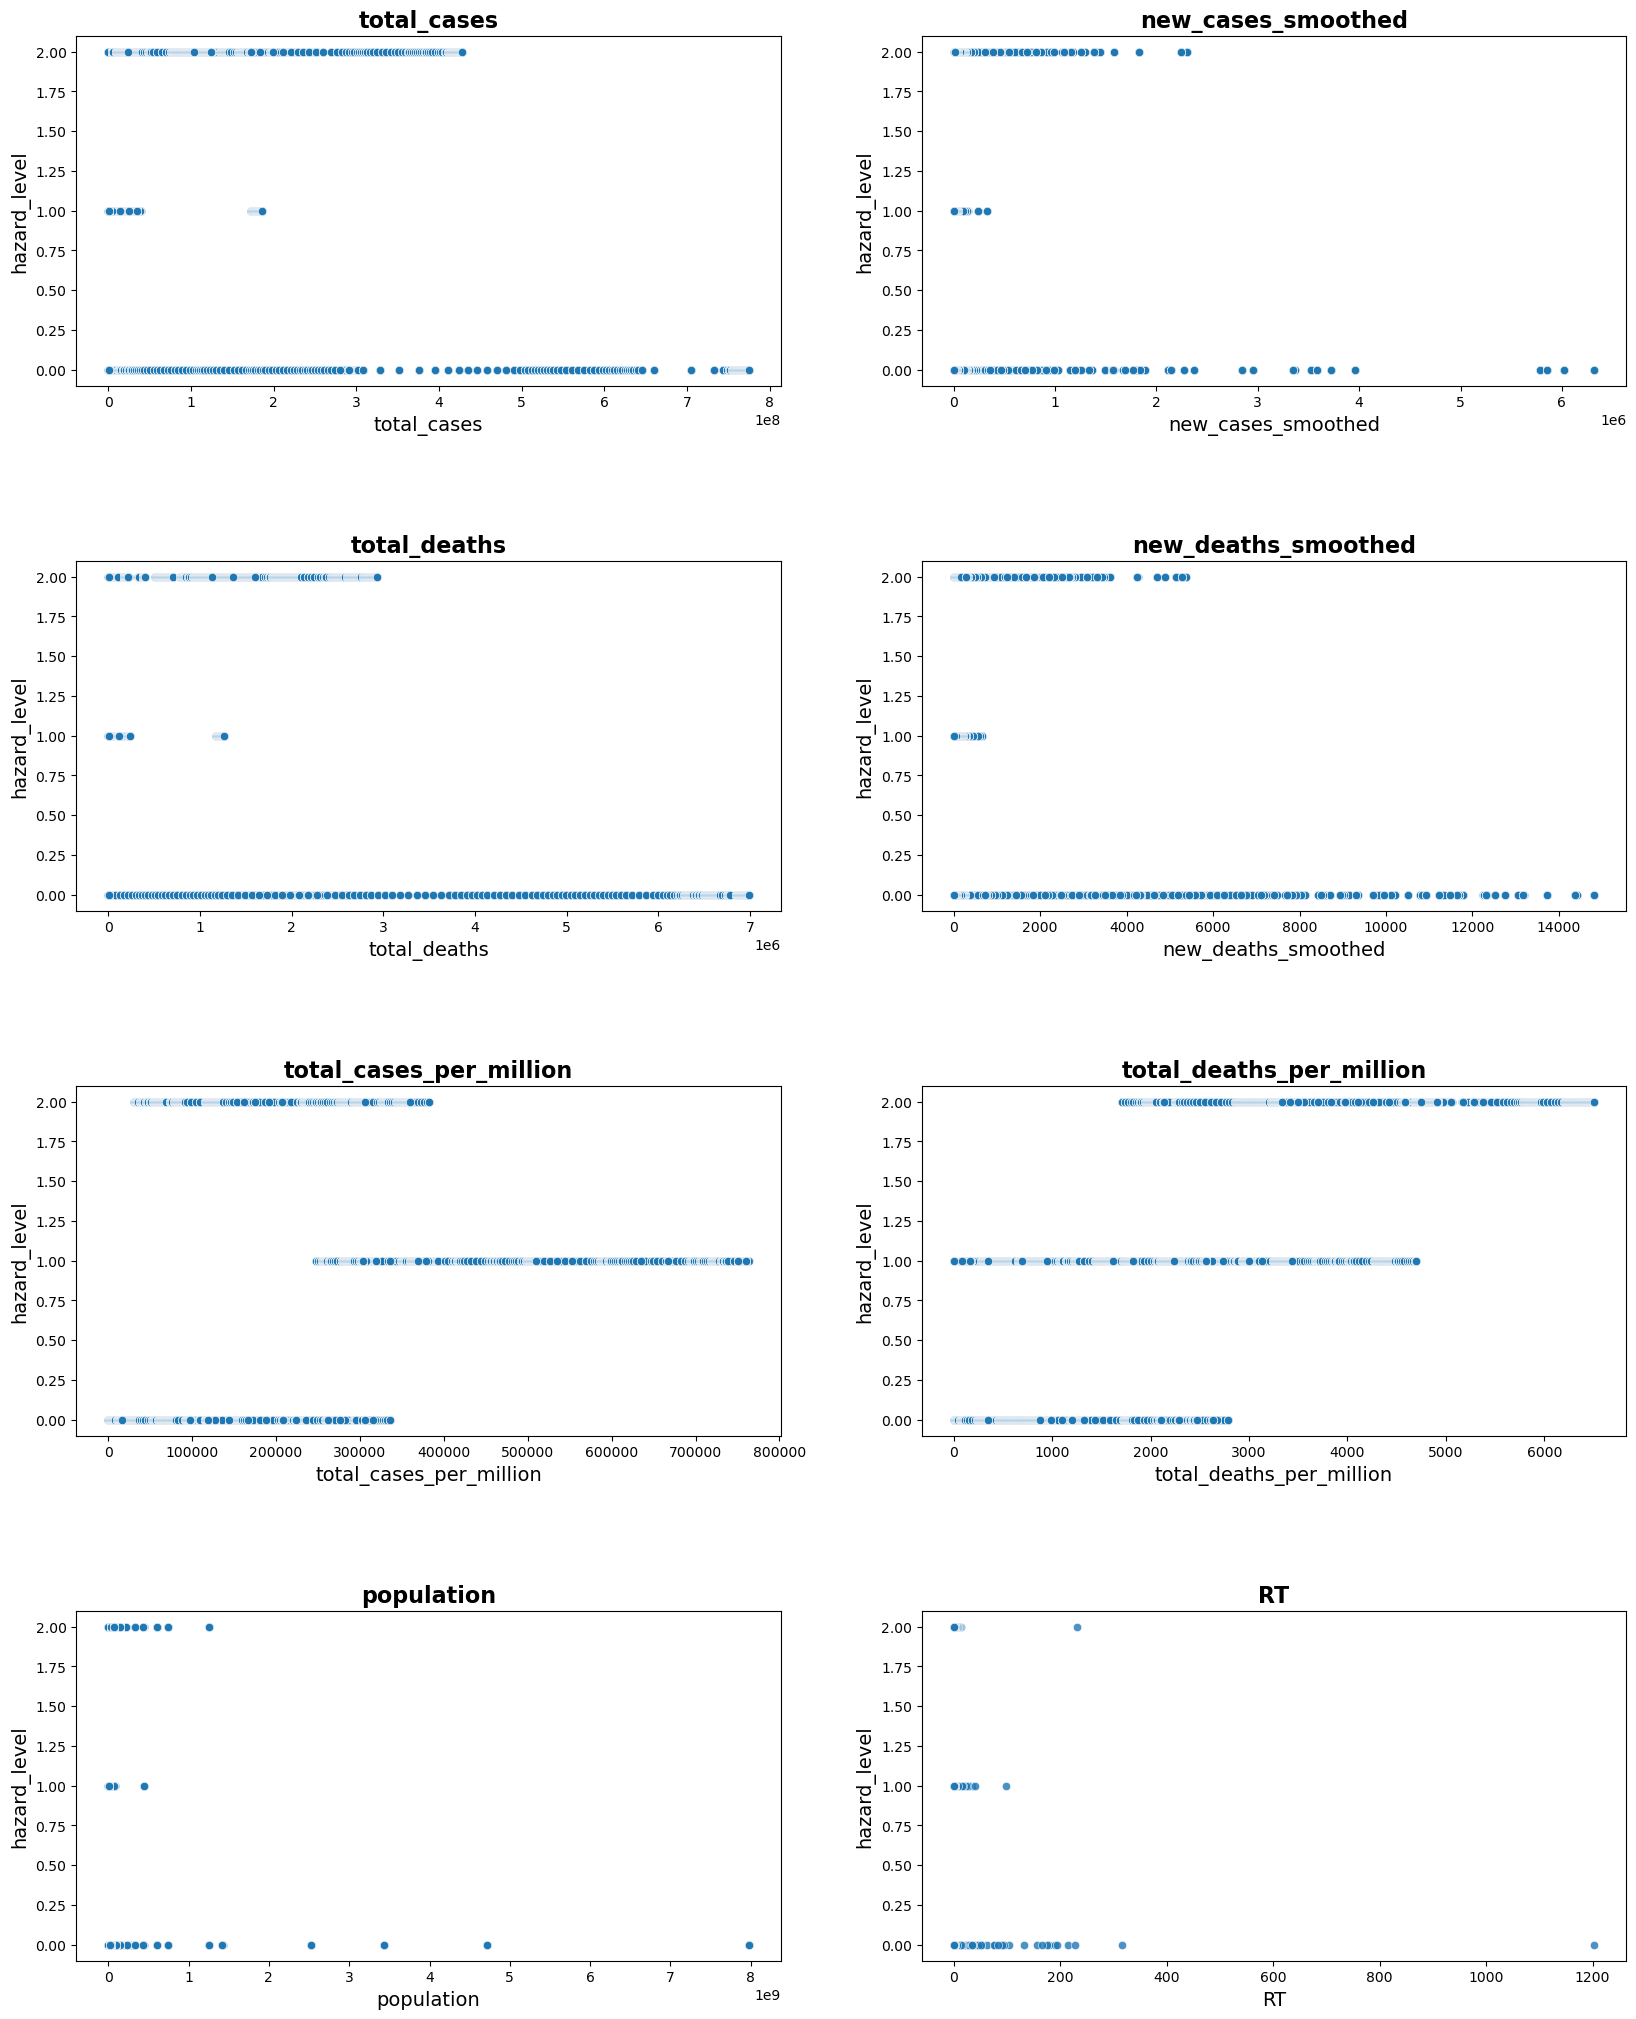

In [14]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(4,2, figsize = (20,25))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Отбираем столбы с типом floate
columns = list(df.columns)[0:-1]

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.scatterplot(data = df,
                x = column,
                y = 'hazard_level',
                alpha = 0.8,
                ax = ax)
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('hazard_level', fontsize = 14)
    
plt.show()

 Лучше всего видна зависимость у total_cases_per_million, при безопасном уровне он имеет значения от 0 до 300000, при среднем уровне имеется распределение от 3000000  до 800000, и опасный уровень от 100000(когда только начиналось сильное заражение) до 400000. С  total_deaths_per_million примерно такая же ситуация, на переуд опасности, было намного больше смертей, тогда ещё не пользовались вакциной. Так же можно заметить что в городах с большей численостью, был в основном низкий уровень опасности.

### 2.3 Классификация исходных компетенций


Выберите модель классификации данных по уровням опасности посещения для туристов.
Приведите обоснование выбора модели. 

#### RandomForestClassifier

RandomForestClassifier подходит для следующих видов данных:
    
    Данные с категориальными и числовыми признаками.
    
    Данные с низким уровнем корреляции между признаками.
    
    Данные с высокой размерностью и большим количеством признаков.
    
    Данные с нелинейными зависимостями между признаками.
    
    Данные с несбалансированными классами.
    
Модель RandomForestClassifier подходит, так как у нас имеются числовые признаки (все), у многих признаков низкая корреляция друг с другом, и признаки не имеют линейной зависимости.

#### GaussianNB

Гауссов наивный Байесовский классификатор — один из нескольких алгоритмов, доступных в машинном обучении, которые можно использовать для решения широкого круга задач. Поэтому возьмём его как предпологаемую модель, которая сработает благодаря своей простоте. Подходят для данных которые непрерывно распределены. Так же GaussianNB плохо работает с категориальными переменными, у нас такие отсутвуют, так что это будет хороший вариант.

#### LinearDiscriminantAnalysis

Linear Discriminant Analysis (LDA) подходит для следующих типов данных:
данные с непреобразуемыми фиксированными характеристиками, такими как:

    Нумерические данные (например, оценка заражаемости);
    
    Квалитативные данные (например, категория профессий);
    
    Маломерные данные (до 10-15 характеристик);
    
    Данные, где главная задача — классификация или сведение размерности данных перед последующим классификационным 
    процессом.
    
То есть данная модель подходит для выборки, не используем много характеристик, и в основном она имеет нумерические данные.


### 2.4 Обучение
Проведите обучение выбранной модели на обучающей выборке. Протестируйте работу
обученной модели на тестовой выборке. Определите показатели точности работы выбранной
модели, сравните с остальными рассматриваемыми моделями.

#### RandomForestClassifier

Начнём с данной модели, уменьшим у неё глубину и увеличим n_estimators, для избежания переобучения модели.

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3, n_estimators=10)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

In [53]:
accuracy_score(rfc_predict, y_test)

0.9558508429532431

In [54]:
print(classification_report(rfc_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    102571
           1       0.96      0.96      0.96     14686
           2       0.41      0.94      0.57      3153

    accuracy                           0.96    120410
   macro avg       0.79      0.95      0.83    120410
weighted avg       0.98      0.96      0.96    120410



Просмотрим на практике сколько значений предсказанно не верно.

In [18]:
rfc_predict_ = rfc.predict(X)
X['rfc_predict'] = rfc_predict_
X['hazard_level'] = df['hazard_level']
X[X['rfc_predict'] != X['hazard_level']]

,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT,rfc_predict,hazard_level
8158,23740.0,287.143,140.0,0.143,297333.517,1753.441,79843.0,1.702,0,1
8159,23740.0,287.143,140.0,0.143,297333.517,1753.441,79843.0,0.000,0,1
8160,23740.0,287.143,140.0,0.143,297333.517,1753.441,79843.0,0.000,0,1
8161,23740.0,287.143,140.0,0.143,297333.517,1753.441,79843.0,1.000,0,1
8162,23740.0,287.143,140.0,0.143,297333.517,1753.441,79843.0,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...
349490,981186.0,289.429,7455.0,1.429,286662.132,2178.044,3422796.0,0.000,0,1
349491,981186.0,289.429,7455.0,1.429,286662.132,2178.044,3422796.0,1.000,0,1
349492,981186.0,289.429,7455.0,1.429,286662.132,2178.044,3422796.0,0.000,0,1
349493,981186.0,289.429,7455.0,1.429,286662.132,2178.044,3422796.0,0.000,0,1


In [19]:
persent =X[X['rfc_predict'] != X['hazard_level']].shape[0]/ X.shape[0] * 100
print(f'Итого не правильно предсказаных значений: {round(persent, 3)} %')

Итого не правильно предсказаных значений: 1.143 %


In [20]:
X.drop(columns=['hazard_level', 'rfc_predict'], inplace=True)

Можем увидеть, что точность хорошая, лучше всего предсказан безопасный уровень, и если посмотреть по выводу X, то можно увидеть, что при 1 уровне в hazard_level, модель больше ориентировалася на 0 уровень.

#### GaussianNB

Далее обучим модель GaussianNB,которая расчитана на разные выборки, посмотрим какой будет результат.

In [21]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_test)

In [22]:
accuracy_score(gnb_predict, y_test)

0.8611411012374387

In [23]:
print(classification_report(gnb_predict, y_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     90695
           1       0.99      0.51      0.67     28056
           2       0.18      0.79      0.29      1659

    accuracy                           0.86    120410
   macro avg       0.69      0.76      0.63    120410
weighted avg       0.91      0.86      0.86    120410



Просмотрим на практике сколько значений предсказанно не верно.

In [24]:
gnb_predict_ = gnb.predict(X)
X['gnb_predict'] = gnb_predict_
X['hazard_level'] = df['hazard_level']
X[X['gnb_predict'] != X['hazard_level']]

,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT,gnb_predict,hazard_level
6790,5857.0,13.143,26.0,0.429,132227.114,586.974,4.429500e+04,0.4,1,0
6791,5857.0,13.143,26.0,0.429,132227.114,586.974,4.429500e+04,0.0,1,0
6792,5857.0,13.143,26.0,0.429,132227.114,586.974,4.429500e+04,0.0,1,0
6793,5857.0,13.143,26.0,0.429,132227.114,586.974,4.429500e+04,1.0,1,0
6794,5857.0,13.143,26.0,0.429,132227.114,586.974,4.429500e+04,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
360018,732366228.0,3961814.286,6728458.0,4625.429,91831.209,843.633,7.975105e+09,0.0,2,0
360019,732366228.0,3961814.286,6728458.0,4625.429,91831.209,843.633,7.975105e+09,1.0,2,0
360020,732366228.0,3961814.286,6728458.0,4625.429,91831.209,843.633,7.975105e+09,0.0,2,0
360021,732366228.0,3961814.286,6728458.0,4625.429,91831.209,843.633,7.975105e+09,0.0,2,0


In [25]:
persent =X[X['gnb_predict'] != X['hazard_level']].shape[0]/ X.shape[0] * 100
print(f'Итого не правильно предсказаных значений: {round(persent, 3)} %')

Итого не правильно предсказаных значений: 13.86 %


In [26]:
X.drop(columns=['hazard_level', 'gnb_predict'], inplace=True)

Хороший коэфицент предсказания при безопасном и среднем уровне опасности, однако очень плохо предсказан опасный уровень, это так же можно заметить при просмотре X и добавления в него столбцов predict и hazard_level.

#### LinearDiscriminantAnalysis

Если сравнивать с другими моделями, то данная подходит больше всего для этой выборки.

In [27]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

In [28]:
accuracy_score(clf_predict, y_test)

0.9705838385516153

In [29]:
print(classification_report(clf_predict, y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     97180
           1       0.92      0.90      0.91     14751
           2       0.94      0.81      0.87      8479

    accuracy                           0.97    120410
   macro avg       0.95      0.90      0.92    120410
weighted avg       0.97      0.97      0.97    120410



Просмотрим на практике сколько значений предсказанно не верно.

In [30]:
clf_predict_ = clf.predict(X)
X['clf_predict'] = clf_predict_
X['hazard_level'] = df['hazard_level']
X[X['clf_predict'] != X['hazard_level']]

,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,population,RT,clf_predict,hazard_level
13945,4929412.0,12621.143,110905.0,195.286,108314.149,2436.920,4.551032e+07,0.841,2,0
13946,4929412.0,12621.143,110905.0,195.286,108314.149,2436.920,4.551032e+07,0.000,2,0
13947,4929412.0,12621.143,110905.0,195.286,108314.149,2436.920,4.551032e+07,0.000,2,0
13948,4929412.0,12621.143,110905.0,195.286,108314.149,2436.920,4.551032e+07,1.000,2,0
13949,4929412.0,12621.143,110905.0,195.286,108314.149,2436.920,4.551032e+07,0.000,2,0
...,...,...,...,...,...,...,...,...,...,...
360411,774537362.0,11115.714,6986756.0,70.429,97110.843,881.048,7.975105e+09,1.000,2,0
360412,774537362.0,11115.714,6986756.0,70.429,97110.843,881.048,7.975105e+09,0.000,2,0
360413,774537362.0,11115.714,6986756.0,70.429,97110.843,881.048,7.975105e+09,0.000,2,0
360414,774537362.0,11115.714,6986756.0,70.429,97110.843,881.048,7.975105e+09,0.000,2,0


In [31]:
persent =X[X['clf_predict'] != X['hazard_level']].shape[0]/ X.shape[0] * 100
print(f'Итого не правильно предсказаных значений: {round(persent, 3)} %')

Итого не правильно предсказаных значений: 2.945 %


Можно увидеть, что модель хорошо обучена, всего 10 тысяч строк предсканно не верно из 360 тысяч.

In [32]:
X.drop(columns=['hazard_level', 'clf_predict'], inplace=True)

#### Сравнение моделей

Данная модель хорошо обучила все уровни опасности, и  имеет 0.97 accuracy.

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

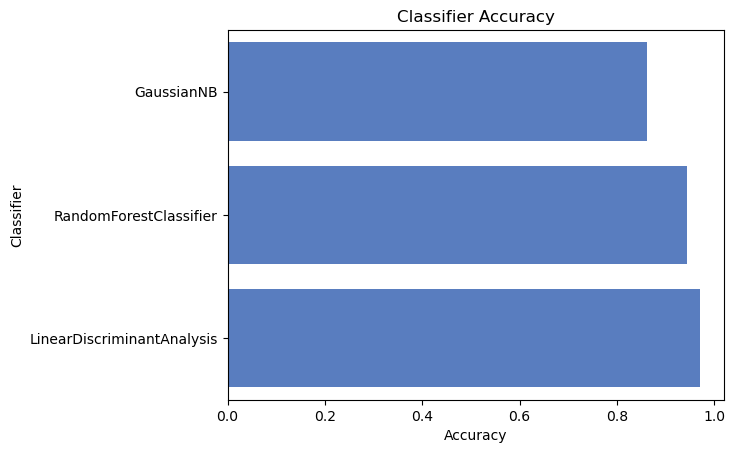

In [55]:
classifiers = [
    GaussianNB(),
    RandomForestClassifier(max_depth=3, n_estimators=10),
    LinearDiscriminantAnalysis()
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
acc_dict = {}

for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = accuracy_score(y_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] 
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

В итоге, если смотреть по метрикам, лучшей моделью является __LinearDiscriminantAnalysis__. При просмотре df с предсказаниями данной модели, можно увидеть, что она предсказывает почти идеально все уровни опсаности, имея неправильный процент предсказаний всего в 2.9%. Так же если проанализовать для каких данных лучше подходит эта модель(п. 2.3), то можно понять, что для данной выборки она лучше других моделей.

Поэтому в дальнейшим будем использовать и улучшать именно эту модель.

### 2.5 Feature Engineering
Путём преобразования набора данных, добейтесь более точной работы выбранной модели.
Опишите приемы генерации новых данных и результаты, к которым они привели, рассматривая
все ранее определенные показатели точности.

Для начала попробуем улучшить выбранную модель, добавив все признаки.

In [101]:
X = df_all[['total_cases',
'new_cases',
'new_cases_smoothed',
'total_deaths',
'new_deaths',
'new_deaths_smoothed',
'total_cases_per_million',
'new_cases_per_million',
'new_cases_smoothed_per_million',
'total_deaths_per_million',
'new_deaths_per_million',
'new_deaths_smoothed_per_million',
'new_vaccinations_smoothed',
'new_people_vaccinated_smoothed',
'population_density',
'median_age',
'gdp_per_capita',
'extreme_poverty',
'female_smokers',
'male_smokers',
'handwashing_facilities',
'hospital_beds_per_thousand',
'human_development_index',
'population',
'RT']]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(244466, 25) (120410, 25) (244466,) (120410,)


In [169]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

In [170]:
accuracy_score(clf_predict, y_test)

0.9738393821111203

In [171]:
print(classification_report(clf_predict, y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     97739
           1       0.93      0.92      0.93     14610
           2       0.92      0.84      0.88      8061

    accuracy                           0.97    120410
   macro avg       0.94      0.92      0.93    120410
weighted avg       0.97      0.97      0.97    120410



Можно увидеть что точность модели улучшилась на 0.03 единицы, с использованием всех признаков. При уменьшений же этих признаком, модель предсказывает хуже.

Теперь попробуем, оставить данные признаки и с помощью GridSearchCV найдём лучшие параметры для модели LDA. Будем изменять такие параметры как: 

- __solver__ 

    ‘svd’: разложение по сингулярным значениям (по умолчанию). Не вычисляет ковариационную матрицу, поэтому этот решатель рекомендуется для данных с большим количеством признаков.

    ‘lsqr’: решение методом наименьших квадратов. Может быть объединен с оценкой усадки или пользовательской ковариации.

    ‘eigen’: Разложение по собственным значениям. Может быть объединен с оценкой усадки или пользовательской ковариации.
    
    
- __shrinkage__

    None: no shrinkage (default).

    ‘auto’: automatic shrinkage using the Ledoit-Wolf lemma.
    
    
- __tol__

    Абсолютный порог для того, чтобы сингулярное значение X считалось значимым, используемый для оценки ранга X. Измерения, сингулярные значения которых не являются значимыми, отбрасываются. Используется только в том случае, если решателем является ‘svd’.
    
    
- __n_components__ 

    Количество компонентов (<= min(n_classes - 1, n_features)) для уменьшения размерности. Если нет, будет установлено значение min(n_classes - 1, n_features). Этот параметр влияет только на метод преобразования.

In [159]:
# Определение параметров для перебора
parameters = {'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': [None, 'auto'], 'tol': [0.0001, 0.001, 0.01], 
              'n_components': [-1, 0, 1, 2]}

lda = LinearDiscriminantAnalysis()

# Поиск лучших параметров с помощью Grid Search и кросс-валидации
grid_search = GridSearchCV(lda, parameters, cv=5)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)

# Предсказание на тестовых данных с лучшими параметрами
clf_predict = grid_search.predict(X_test)

Лучшие параметры: {'n_components': -1, 'shrinkage': 'auto', 'solver': 'eigen', 'tol': 0.0001}


In [160]:
accuracy_score(clf_predict, y_test)

0.9742214101818786

In [161]:
print(classification_report(clf_predict, y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     97749
           1       0.93      0.92      0.93     14619
           2       0.92      0.84      0.88      8042

    accuracy                           0.97    120410
   macro avg       0.95      0.92      0.93    120410
weighted avg       0.97      0.97      0.97    120410



In [167]:
clf_predict_ = grid_search.predict(X)
X['clf_predict'] = clf_predict_
X['hazard_level'] = df['hazard_level']
X.sample(15)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,population,RT,clf_predict,hazard_level
75514,88293.0,0.0,3.571,834.0,0.0,0.000,3135.344,0.000,0.127,29.616,...,28.2,6.3,33.1,19.3510,2.500,0.538,28160548.0,0.000,0,0
57334,3628005.0,0.0,9563.714,38301.0,0.0,46.286,94345.817,0.000,248.703,996.013,...,0.5,12.0,16.6,49.6905,2.500,0.929,38454328.0,0.000,0,0
276425,52.0,0.0,2.714,0.0,0.0,0.000,289.094,0.000,15.090,0.000,...,2.5,6.3,33.1,87.2020,1.300,0.759,179872.0,1.000,0,0
257798,3934683.0,0.0,2336.714,62819.0,0.0,33.143,34049.124,0.000,20.221,543.610,...,2.5,7.8,40.8,78.4630,1.000,0.718,115559008.0,0.000,0,0
156326,1265181.0,0.0,5761.286,7716.0,0.0,20.429,133895.756,0.000,609.724,816.594,...,0.5,15.4,35.4,49.6905,2.990,0.919,9449000.0,0.000,0,0
19463,7036.0,0.0,15.286,103.0,0.0,0.286,268.781,0.000,0.584,3.935,...,0.5,13.0,16.5,49.6905,3.840,0.944,26177410.0,0.000,0,0
309089,556761.0,0.0,9357.143,31540.0,0.0,72.857,11706.834,0.000,196.750,663.181,...,1.0,27.4,31.4,49.6905,2.970,0.904,47558632.0,0.000,0,0
131131,15240.0,0.0,6.429,270.0,0.0,0.429,88716.578,0.000,37.423,1571.750,...,2.5,6.3,33.1,49.6905,2.500,0.740,171783.0,0.000,0,0
226035,1308735.0,0.0,6870.000,16736.0,0.0,21.429,74512.270,0.000,391.141,952.857,...,2.5,24.4,27.3,49.6905,3.320,0.944,17564020.0,0.000,0,0
149723,6823766.0,0.0,285.143,161995.0,0.0,3.286,24768.540,0.000,1.035,588.001,...,5.7,2.8,76.1,64.2040,1.040,0.718,275501344.0,0.000,0,0


In [168]:
persent =X[X['clf_predict'] != X['hazard_level']].shape[0]/ X.shape[0] * 100
print(f'Итого не правильно предсказаных значений: {round(persent, 3)} %')

Итого не правильно предсказаных значений: 2.591 %


In [165]:
X.drop(columns=['hazard_level', 'clf_predict'], inplace=True)

В итоге мы смогли улучшить модель LDA с точности 0.97 до 0.974. Изменились предсказания среднего уровня опасности и высокого, с 0.92 и 0.94 превратились в 0.93 и 0.92.

Для улучшения модели, использовали все признаки, не включая признаки даты и локаций, и использовали лучшие параметры {'n_components': -1, 'shrinkage': 'auto', 'solver': 'eigen', 'tol': 0.0001}.

### 2.6 Подготовка отчета
Подготовьте отчет о проделанной работе по итогам сессии в котором будут представлены
результаты, выводы и обоснования выбора по каждому разделу задания. В отчете также
опишите содержимое результирующих файлов архива Data.zip

### Вывод 

__2.1 Разбиение набора данных__

Для начала записали данные с result_1.csv в dataframe. Поменяли значения hazard_level с object на int для дальнейшей работы. После этого разбили выборку на обучающую и тестовую с соотношением 0.33 на 0.67. Взяли для данного разбиения значения, которые больше всего подъходят для обучения модели.

__2.2 Визуализация зависимостей данных__

Для того, чтобы определить насколько признаки совместимы с целевой переменной, визуализировали корреляцию признаков, по которой выяснили некоторые зависимоти, создали pairplot для зависимости атрибутов между друг другом, и просмотрели линейную зависимость между целевой переменной и другими признаками. Сделали вывод, что данные признаки подъходят для классификаций.

__2.3 Классификация исходных компетенций__

Проанализировав разные модели классификаций, выбрали три модели опираясь на выводы по прошлому пунтку: на нормализацию данных, на количество признаков и их корреляцию. В итоге взяли модели GaussianNB, RandomForestClassifier, LinearDiscriminantAnalysis.

__2.4 Обучение__

Провели обучение, выбраных в пункте 2.3, моделей. Проанализировали метрики данных моделей и их значения в обучений, и по итогам выбрали лучшую модель LinearDiscriminantAnalysis, которая так же больше всех подъходит данной выборке.

__2.5 Feature Engineering__

Улучшили модель LinearDiscriminantAnalysis, с помощью добавления признаков, и нахождения лучших параметров с помощью GridSearch. В итоге модель была улучшена.

__2.6 Подготовка отчета__

Создали отчёт Report_2.html + Report_2.ipynb и файл Readme_2.txt содержащий информацио о данных, записали всё в Data_2.zip.